In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')


In [4]:
sample_data = [
    ('Apple', 10, 1.5),
    ('Banana', 20, 0.5),
    ('Orange', 15, 1.0),
    ('Apple', 5, 1.5),
    ('Banana', 10, 0.5),
    ('Orange', 10, 1.0),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [7]:
query = '''
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)


In [8]:
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         15     22.5
1  Banana         30     15.0
2  Orange         25     25.0


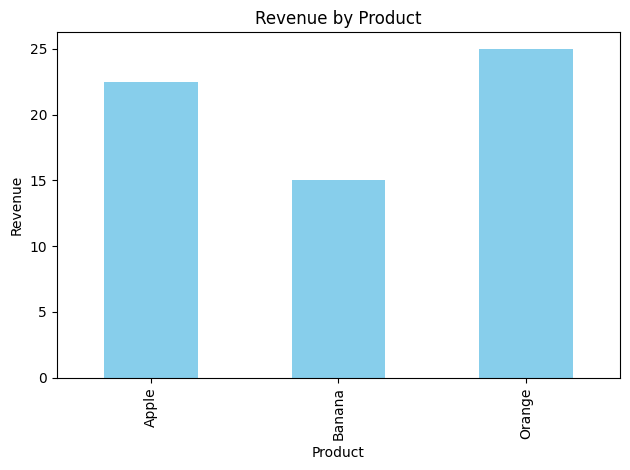

In [9]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: save chart
plt.show()


In [10]:
conn.close()
